In [1]:
import tqdm as tqdm

In [64]:
#Load dataset
import json


with open('../data/formatted/meta_dataset.txt', 'r') as jsonFile:
    meta_augmented = json.load(jsonFile)
    
with open('../data/formatted/dataset_augmented.txt', 'r') as jsonFile:
    dataset_augmented = json.load(jsonFile)
    
with open('../data/formatted/midi_voicing_dataset.txt', 'r') as jsonFile:
    midi_voicing_dataset = json.load(jsonFile)

print(len(midi_voicing_dataset), len(dataset_augmented), len(meta_augmented))

48072 48072 48072


- Fix the Style Token
- Split the songs that are too long into two sections

In [65]:
import importlib
import formats as fmt
importlib.reload(fmt)

fmt.correctStyleTokensInMeta(meta_augmented)

all_styles = []
for song in meta_augmented:     
    all_styles.append(song['style'])

styles = set(all_styles)
print(len(styles))
print(meta_augmented[0])

for i, song in enumerate(meta_augmented[:48]):
    print(song)

  0%|          | 0/48072 [00:00<?, ?it/s]

63
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'C major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'C major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'Db major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'D major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'Eb major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Won

In [66]:
#Add the tonality token to the dataset and to the midi_voicing_dataset
new_dataset = dataset_augmented.copy()
for i, song in enumerate(new_dataset):
    song[0] = ['Style', 0.0]
    midi_voicing_dataset[i][0] = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style']
    tonality = meta_augmented[i]['tonality']
    tonal_token = ['Tonality', 0.0]
    element_to_add = [tonality, 0.0]
    #add these two elements into the third position of the list
    song.insert(2, tonal_token)
    song.insert(3, element_to_add)
    
    midi_tonal_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality']
    element_to_add = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, tonality]
    midi_voicing_dataset[i].insert(2, midi_tonal_token)
    midi_voicing_dataset[i].insert(3, element_to_add)
    
print(len(new_dataset), len(midi_voicing_dataset))

48072 48072


In [67]:
def array_to_tuples(array):
    return [tuple(sub_array) for sub_array in array]

In [7]:
# for i, song in enumerate(new_dataset):
#     ar = array_to_tuples(song)
#     new_dataset[i] = ar
    
# #ar = array_to_tuples(new_dataset[0])
# print(new_dataset[0])

[('Style', 0.0), ('Medium Swing', 0.0), ('Tonality', 0.0), ('C major', 0.0), ('|', 0.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('D', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('G', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 0.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('D', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('G', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('F#', 2.0), ('m7', 2.0), ('.', 2.0), ('B', 2.0), ('dom7', 2.0), ('|', 2.0), ('.', 4.0), ('E', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('F#', 2.0), (

In [8]:
# for i, song in enumerate(midi_voicing_dataset):
#     ar = array_to_tuples(song)
#     midi_voicing_dataset[i] = ar
    
# #ar = array_to_tuples(new_dataset[0])
# print(midi_voicing_dataset[0])

[([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Medium Swing'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'C major'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'), ([48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'), ([48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'), ([49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'), ([49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([50, 0, 0, 0, 0, 0, 0, 0], 4.0, 'D'), ([50, 57, 60, 65, 0, 0, 0, 0], 4.0, 'm7'), ([0, 0, 0, 0, 0, 0, 0, 0], 

In [70]:
id = 24768
print(new_dataset[id][:2048])

[['Style', 0.0], ['Medium Shuffle', 0.0], ['Tonality', 0.0], ['C major', 0.0], ['Form_intro', 0.0], ['|', 0.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['A', 1.0], ['|', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['A', 1.0], ['|', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['G', 1.0], ['|', 1.0], ['.', 1.0], ['Ab', 1.0], ['maj', 1.0], ['.', 1.0], ['Bb', 1.0], ['maj', 1.0], ['.', 2.0], ['C', 2.0], ['maj', 2.0], ['Form_A', 2.0], ['|', 2.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1

In [30]:
#Add Start and End token

for i, song in enumerate(new_dataset):
    start_token = ['<Start>', 0.0]
    end_token = ['<End>', 0.0]
    song.insert(4, start_token)
    song.append(end_token)
    
print(new_dataset[0])

[['Style', 0.0], ['Medium Swing', 0.0], ['Tonality', 0.0], ['C major', 0.0], ('<Start>', 0.0), ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.0], ['F#', 2.0], ['m7', 2.0], ['.', 2.0], ['B', 2.0], ['dom7', 2.0], ['|', 2.0], ['.', 4.0], ['E', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.

In [71]:
print(midi_voicing_dataset[0])

[[[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Medium Swing'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'C major'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'], [[48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'], [[48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'], [[49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'], [[49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[50, 0, 0, 0, 0, 0, 0, 0], 4.0, 'D'], [[50, 57, 60, 65, 0, 0, 0, 0], 4.0, 'm7'], [[0, 0, 0, 0, 0, 0, 0, 0], 

In [72]:
for i, song in enumerate(midi_voicing_dataset):
    start_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<Start>']
    end_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<End>']
    song.insert(4, start_token)
    song.append(end_token)
    
print(midi_voicing_dataset[0])

[[[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Medium Swing'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'C major'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<Start>'], [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'], [[48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'], [[48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'], [[49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'], [[49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'], [[0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'], [[50, 0, 0, 0, 0, 0, 0, 0], 4.0, 'D'], [[50, 57, 60, 65, 0, 0, 0,

In [85]:
#Cut the songs that are longer than 2048
dataset = new_dataset.copy()
dataset = [song[:2048] for song in dataset]

for i, song in enumerate(dataset):
    if len(song) == 2048:
        element = song[-1][0]
        if element == '|' or element == '.' and element != '<End>':
            song[-1][0] = '<End>'
        else:
        #cut the last element until it is a bar or dot and change it to <End>
            while element != '|' and element != '.':
                song.pop()
                element = song[-1][0]
            song[-1][0] = '<End>'    
                
id = 5676
print(len(dataset[id]))

dataset[id][-8:] 

2044


[['maj', 1.0],
 ['.', 2.0],
 ['Eb', 2.0],
 ['maj', 2.0],
 ['.', 1.0],
 ['G', 1.0],
 ['m', 1.0],
 ['<End>', 1.0]]

In [86]:
id = 46571
print(len(dataset[id]))
dataset[id][-6:]

2042


[['D', 1.0], ['maj', 1.0], ['/', 1.0], ['F#', 1.0], ['|', 1.0], ['<End>', 1.0]]

In [87]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)

#calculate how many songs are longer than 2048
counter = 0
lengths = []
for i, song in enumerate(dataset):
    if len(song) > 2048:
        counter += 1
        lengths.append(len(song))
print(counter, lengths)

Max: {'v': 2046, 'id': 26676} Min: {'v': 120, 'id': 39972}
0 []


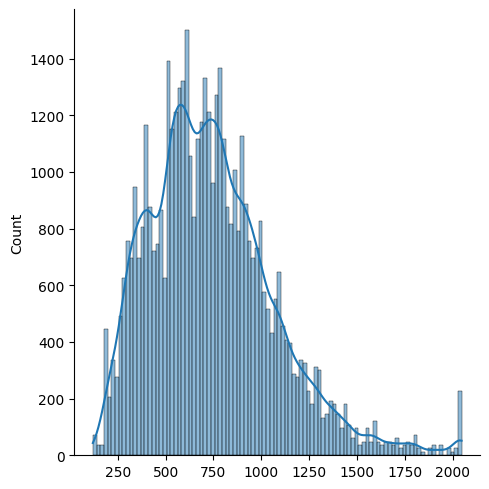

In [88]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=True, bins=100)